In [3]:
# Personal Loan Acceptance Prediction

In [4]:
pip install pandas numpy seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [6]:
# Load the dataset
import pandas
dataframe = pd.read_csv('bank.csv')
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
 # Dataset Understanding

In [8]:
# View basic info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
# Check null values
dataframe.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
# Summary statistics
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
# Data Cleaning & Preparation

In [12]:
# Drop 'duration' as it's not known before the call
if 'duration' in dataframe.columns:
    dataframe.drop('duration', axis=1, inplace=True)

In [13]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in dataframe.select_dtypes(include='object').columns:
    dataframe[col] = label_enc.fit_transform(dataframe[col])

In [14]:
# Confirm all columns are numeric
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  campaign   11162 non-null  int64
 12  pdays      11162 non-null  int64
 13  previous   11162 non-null  int64
 14  poutcome   11162 non-null  int64
 15  deposit    11162 non-null  int64
dtypes: int64(16)
memory usage: 1.4 MB


In [15]:
# Exploratory Data Analysis (EDA)

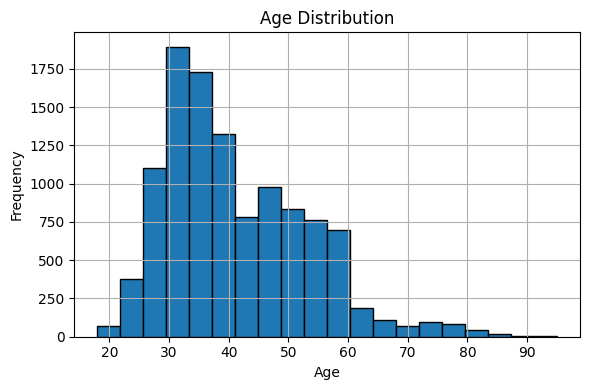

In [21]:
# Age Distribution
plt.figure(figsize=(6, 4))
plt.hist(dataframe['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

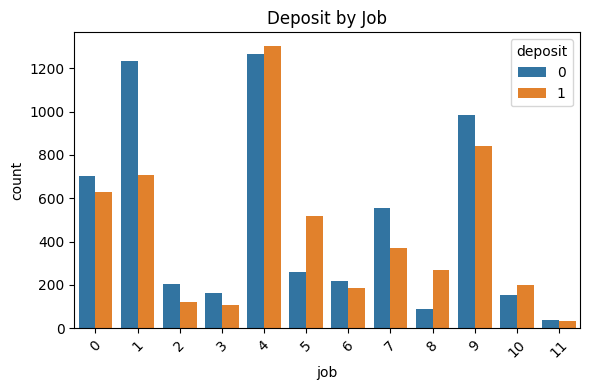

In [22]:
# Deposit count by Job
plt.figure(figsize=(6, 4))
sns.countplot(data=dataframe, x='job', hue='deposit')
plt.title('Deposit by Job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

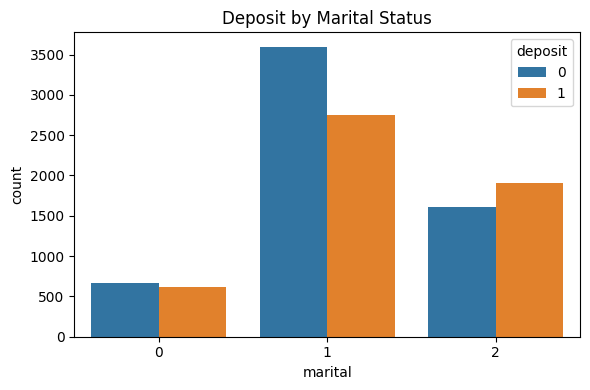

In [23]:
# Deposit count by Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(data=dataframe, x='marital', hue='deposit')
plt.title('Deposit by Marital Status')
plt.tight_layout()
plt.show()

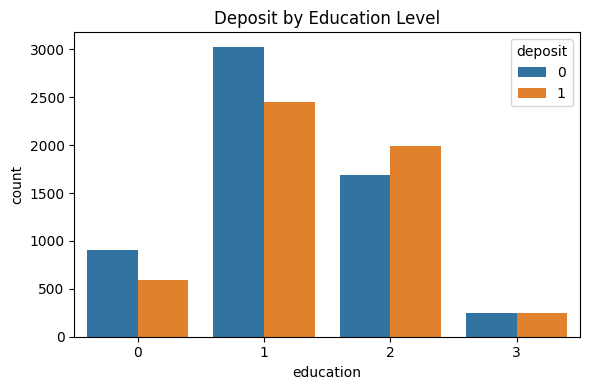

In [24]:
# Education vs Deposit
plt.figure(figsize=(6, 4))
sns.countplot(data=dataframe, x='education', hue='deposit')
plt.title('Deposit by Education Level')
plt.tight_layout()
plt.show()

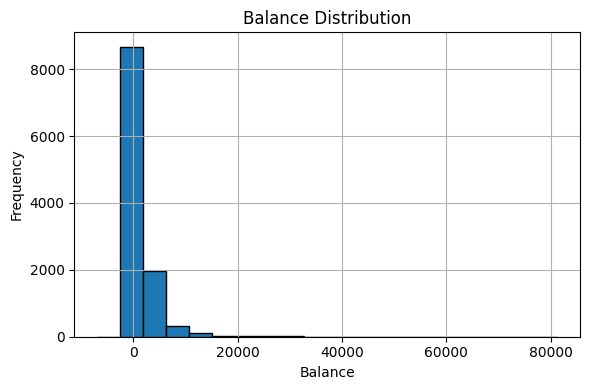

In [25]:
# Balance Distribution
plt.figure(figsize=(6, 4))
plt.hist(dataframe['balance'], bins=20, edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Model Training & Testing

In [29]:
# Separate features and target
X = dataframe.drop('deposit', axis=1)  
y = dataframe['deposit']               

In [30]:
# Split into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [31]:
# Feature scaling for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

In [33]:
# Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)  # No scaling needed for trees
tree_preds = tree_model.predict(X_test)

In [34]:
# Evaluation Metrics

In [38]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error
)

In [40]:
# Logistic Regression Evaluation
import numpy as np
print("Logistic Regression Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))
print("MAE:", mean_absolute_error(y_test, log_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, log_preds)))

Logistic Regression Evaluation:

Accuracy: 0.6688563750373245
Confusion Matrix:
 [[1223  519]
 [ 590 1017]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      1742
           1       0.66      0.63      0.65      1607

    accuracy                           0.67      3349
   macro avg       0.67      0.67      0.67      3349
weighted avg       0.67      0.67      0.67      3349

MAE: 0.3311436249626754
RMSE: 0.5754508015136267


In [41]:
# Decision Tree Evaluation
print("\n Decision Tree Classifier Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))
print("MAE:", mean_absolute_error(y_test, tree_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, tree_preds)))


 Decision Tree Classifier Evaluation:

Accuracy: 0.6369065392654524
Confusion Matrix:
 [[1148  594]
 [ 622  985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.65      1742
           1       0.62      0.61      0.62      1607

    accuracy                           0.64      3349
   macro avg       0.64      0.64      0.64      3349
weighted avg       0.64      0.64      0.64      3349

MAE: 0.3630934607345476
RMSE: 0.6025723697071976


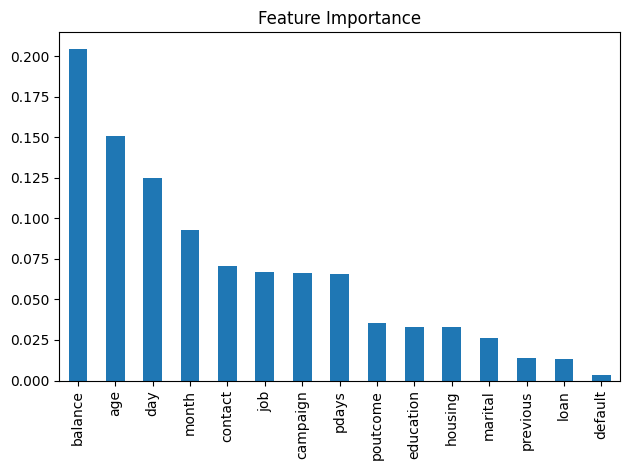

In [46]:
# Conclusion
# Feature Importance from Decision Tree
feature_imp = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

In [43]:
# Conclusion
print("\n CONCLUSION:\n")
# Summary of performance
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print(f"Decision Tree Accuracy: {tree_acc:.2f}")
if log_acc > tree_acc:
    print("\n Logistic Regression performed slightly better in this case.")
    print("It may generalize better due to its simplicity and regularization.")
else:
    print("\n Decision Tree performed better in this case.")
    print("It may be capturing more complex patterns in the data.")
    print("\n Business Insight:")
    print("By analyzing model outputs, we can identify which customer profiles (e.g. age, balance, contact type) are more likely to accept a personal loan.")
    print("This helps the bank to target future marketing efforts more effectively.")


 CONCLUSION:

Logistic Regression Accuracy: 0.67
Decision Tree Accuracy: 0.64

 Logistic Regression performed slightly better in this case.
It may generalize better due to its simplicity and regularization.
